### Import Libraries and Dataset

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [3]:
# load dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


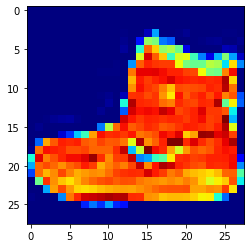

In [4]:
# visualize a sample image
plt.imshow(X_train[0], cmap = 'jet')

In [5]:
# check out the shape of the training data
X_train.shape
# contains 60000 images, each one is 28 pixels * 28 pixels

(60000, 28, 28)

In [6]:
X_test.shape
# contains 10000 images, each one is 28 pixels * 28 pixels

(10000, 28, 28)

### Perform data visualization

4


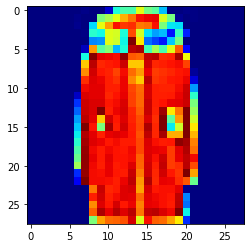

In [7]:
# view a random image
i = random.randint(1, 60000)
plt.imshow(X_train[i], cmap = 'jet')
# prints out the label
print(y_train[i])


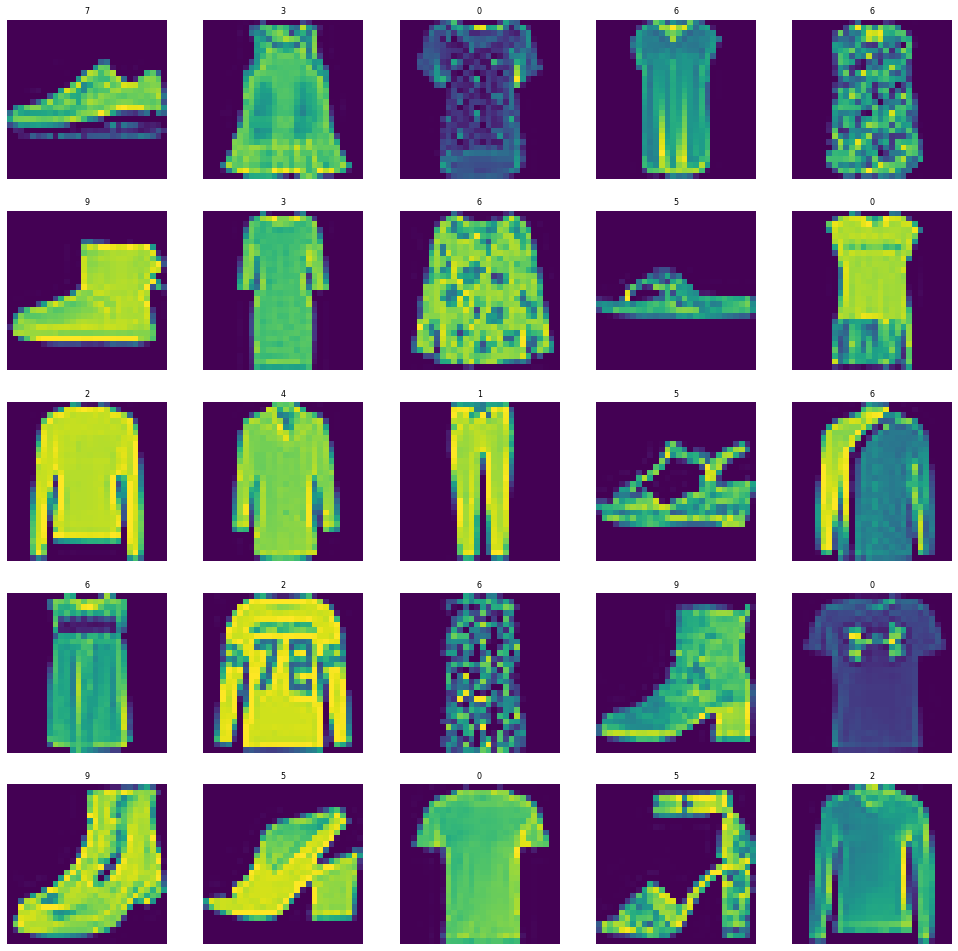

In [9]:
# view the images in a grid format
# Define the dimensions of the plot grid
W_grid = 5
L_gird = 5
# fig, axes = plt.subplots(L_gird, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_gird, W_grid,figsize = (17,17))
axes = axes.ravel() # flatten the 15x15 matrix into 255 array
n_training = len(X_train) #get the length of the training dataset

# select a random number from 0 to n_training
for i in np.arange(0, W_grid*L_gird):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    # print(i)
    axes[i].set_title(y_train[index], fontsize = 8)
    axes[i].axis('off')
plt.show()

### Data Preprocessing

In [10]:
X_train = X_train /255
X_test = X_test / 255

In [11]:
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [12]:
X_test

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [14]:
# add some noise
noise_factor = 0.3
noise_dataset = []
print(X_train[0].shape)
# the image shape is 28 * 28 pixels

(28, 28)


In [21]:
a = np.random.randn(*X_train[0].shape)
print(a.shape)
print(type(a))
shape = X_train[0].shape

(28, 28)
<class 'numpy.ndarray'>


In [19]:
# numpy.clip(a, a_min, a_max, out=None)[source]
x=np.array([[1,2,3,5,6,7,8,9],[1,2,3,5,6,7,8,9]])
np.clip(x,3,8)

array([[3, 3, 3, 5, 6, 7, 8, 8],
       [3, 3, 3, 5, 6, 7, 8, 8]])

In [22]:
for img in X_train:
    noisy_img = img + noise_factor * np.random.randn(*shape)
    # the value of pixels might be more than one
    # must clip the image to range between 0 and 1
    noisy_img = np.clip(noisy_img, 0, 1)
    noise_dataset.append(noisy_img)

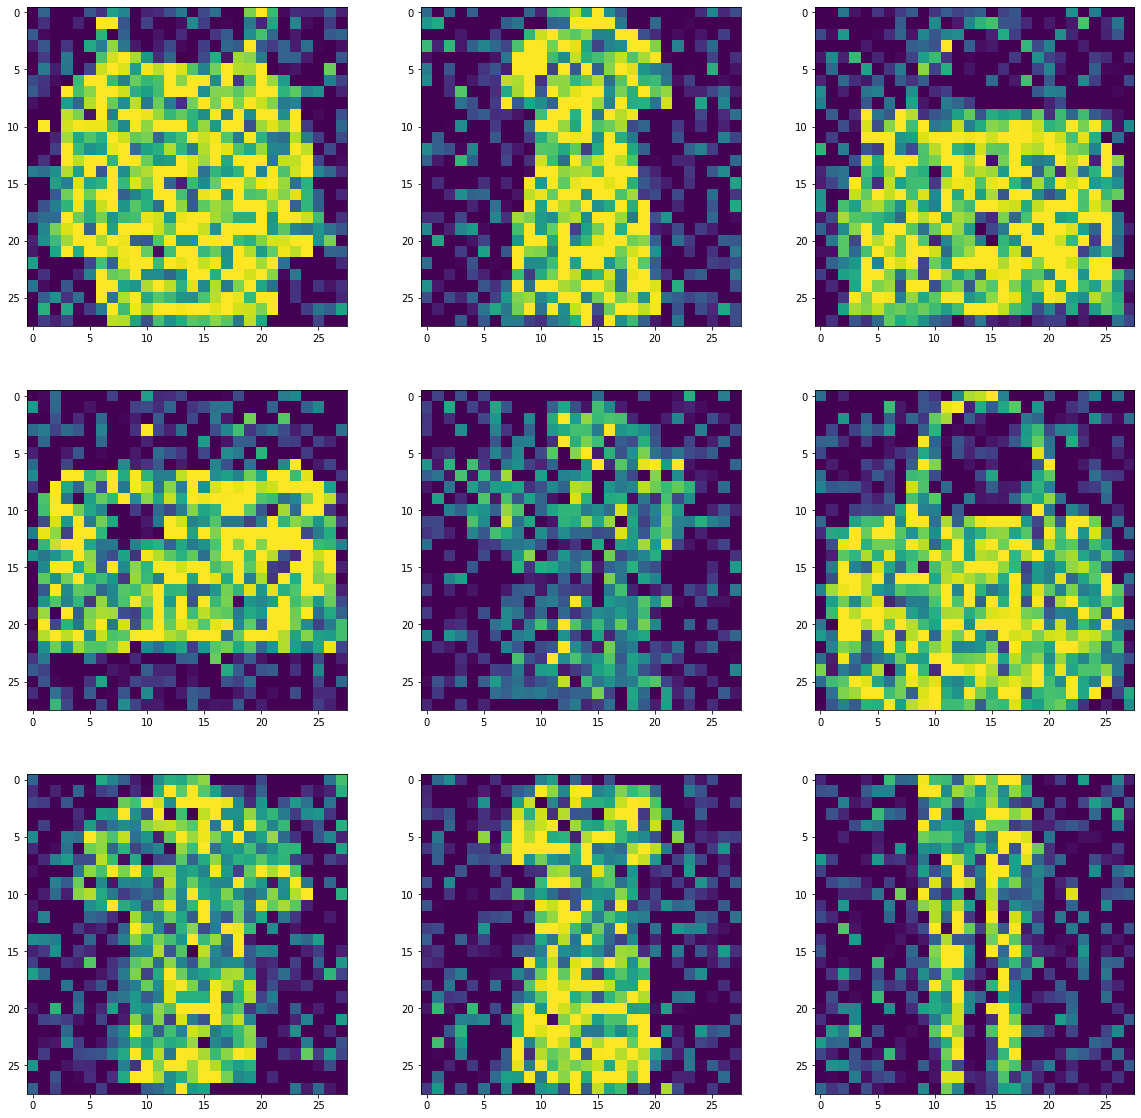

In [25]:
# show some examples of the noisy imgs
W_grid = 3
L_gird = 3
fig, axes = plt.subplots(L_gird, W_grid, figsize =
                         (20,20))
axes = axes.ravel()
n_training = len(noise_dataset)

for i in (np.arange(W_grid*L_gird)):
    index = np.random.randint(0, n_training)
    axes[i].imshow(noise_dataset[index])

In [26]:
# add some noise to test dataset
noise_factor = 0.2
noise_dataset_test = []
shape = X_test[0].shape
for img in X_test:
    noisy_img_test = img * noise_factor *np.random.randn(*shape)
    noisy_img_test = np.clip(noisy_img_test, 0, 1)
    noise_dataset_test.append(noisy_img_test)
    